<a href="https://colab.research.google.com/github/colliercoder/Twitter/blob/main/Debate_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
#Import the libraries

import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [104]:
from google.colab import files
uploaded = files.upload()

Saving TWITTER_KEYS.csv to TWITTER_KEYS (1).csv


In [105]:
#Get the data
keys = pd.read_csv('TWITTER_KEYS.csv',sep = ',')
consumer_key = keys['CONSUMERKEY'][0]
consumer_secret = keys['CONSUMERSECRET'][0]
access_token = keys['ACCESSTOKEN'][0]
access_token_secret = keys['ACCESSTOKENSECRET'][0]
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
#Set the access toekn and access token secret
authenticate.set_access_token(access_token,access_token_secret)
#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [196]:
hashtag = "#secondamendment OR 'second amendment'"
query = tw.Cursor(api.search,
                  q=hashtag,
                  lang = "en",
                  since = '2022-05-20',).items(1000)
tweets = [{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in query] #tweet and timestamp in a dictionary, these dictinaries are in a list
print(tweets)


[{'Tweets': "To the Angel of @BetoORourke to his messenger write ✍️, Don't even bother running for president. You want to manipu… https://t.co/su2YlPf3Ia", 'Timestamp': datetime.datetime(2022, 5, 25, 22, 20, 18)}, {'Tweets': 'RT @OccupyDemocrats: BREAKING: President Biden declares that “The Second Amendment is not absolute” and points out that when it was passed…', 'Timestamp': datetime.datetime(2022, 5, 25, 22, 20, 18)}, {'Tweets': 'RT @WeHearPodcast: I guess Abbott’s second amendment rights are more important than Beto’s first amendment rights!\n\nGuns over children. Gun…', 'Timestamp': datetime.datetime(2022, 5, 25, 22, 20, 17)}, {'Tweets': "RT @OccupyDemocrats: If you agree with President Biden's bold declaration that “The Second Amendment is not absolute” because when it was p…", 'Timestamp': datetime.datetime(2022, 5, 25, 22, 20, 16)}, {'Tweets': 'Second Amendment and shifting blame to millions of gun owners, we waited for more information.', 'Timestamp': datetime.datetime(2022, 

In [197]:
df = pd.DataFrame.from_dict(tweets)
df.head(100)

,Tweets,Timestamp
0,To the Angel of @BetoORourke to his messenger ...,2022-05-25 22:20:18
1,RT @OccupyDemocrats: BREAKING: President Biden...,2022-05-25 22:20:18
2,RT @WeHearPodcast: I guess Abbott’s second ame...,2022-05-25 22:20:17
3,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:20:16
4,Second Amendment and shifting blame to million...,2022-05-25 22:20:16
...,...,...
95,"RT @chrisgeidner: Texas Gov. Greg Abbott, in a...",2022-05-25 22:19:21
96,RT @Angry_Staffer: Waiting a couple of days to...,2022-05-25 22:19:21
97,RT @JoeNeguse: “[T]he right secured by the Sec...,2022-05-25 22:19:20
98,"RT @kylegriffin1: President Biden: ""The Second...",2022-05-25 22:19:18


In [198]:
#Data cleaning
#Create a function to clean the tweets
def cleanTwt(twt):
  twt = re.sub('RT','',twt) #remove 'RT' from the tweets
  twt = re.sub('#[A-Za-z0-9]+','',twt) #remove '#' from the tweets
  twt = re.sub('\\n','',twt) #Remove the '\n' character
  twt = re.sub('http?:\/\/\S+','',twt) #remove hyperlink
  twt = re.sub('@[\S*]','',twt) #Remove @mentions
  twt = re.sub('^[\s]+|[\s]+$','',twt) #remove leading and trailing whitespaces
  return twt


df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)

def capitalize(x):
  return x.upper()

df['Cleaned_Tweets'] = df['Cleaned_Tweets'].apply(capitalize)
df

,Tweets,Timestamp,Cleaned_Tweets
0,To the Angel of @BetoORourke to his messenger ...,2022-05-25 22:20:18,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...
1,RT @OccupyDemocrats: BREAKING: President Biden...,2022-05-25 22:20:18,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...
2,RT @WeHearPodcast: I guess Abbott’s second ame...,2022-05-25 22:20:17,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...
3,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:20:16,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...
4,Second Amendment and shifting blame to million...,2022-05-25 22:20:16,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...
...,...,...,...
995,"RT @kylegriffin1: President Biden: ""The Second...",2022-05-25 22:08:38,"YLEGRIFFIN1: PRESIDENT BIDEN: ""THE SECOND AMEN..."
996,RT @aeirould: It would be nice if the Straight...,2022-05-25 22:08:38,EIROULD: IT WOULD BE NICE IF THE STRAIGHT OUT ...
997,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:08:37,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...
998,"RT @NPR: ""The Second Amendment did not come do...",2022-05-25 22:08:37,"PR: ""THE SECOND AMENDMENT DID NOT COME DOWN FR..."


In [199]:
gun_laws = ['AR-15','2ND AMENDMENT','MILITARY GRADE','ASSAULT RIFLE','BAN','FIREARMS','FIREARM','GUN','GUN LAWS',
            'RESTRICTIONS','REMOVE','ABOLISH','GUN CONTROL','END GUN','VIOLENCE','CONSTITUTION','RIGHT TO BEAR ARMS','FREEDOM','NRA']
white_people = ['WHITE','WHITE MALE','WHITE MAN','WHITE MEN','OLD WHITE MEN','FOUNDING FATHERS','COLONIZERS','COLONIZER','RACIST','WHITE DEVIL']




In [200]:
def identify_subject(tweet,refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag = 1
  return flag

df['GUN LAWS'] = df['Cleaned_Tweets'].apply(lambda x: identify_subject(x,gun_laws))

df['WHITE PEOPLE'] = df['Cleaned_Tweets'].apply(lambda x: identify_subject(x,white_people))

df

,Tweets,Timestamp,Cleaned_Tweets,GUN LAWS,WHITE PEOPLE
0,To the Angel of @BetoORourke to his messenger ...,2022-05-25 22:20:18,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...,0,0
1,RT @OccupyDemocrats: BREAKING: President Biden...,2022-05-25 22:20:18,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...,0,0
2,RT @WeHearPodcast: I guess Abbott’s second ame...,2022-05-25 22:20:17,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...,1,0
3,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:20:16,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...,0,0
4,Second Amendment and shifting blame to million...,2022-05-25 22:20:16,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...,1,0
...,...,...,...,...,...
995,"RT @kylegriffin1: President Biden: ""The Second...",2022-05-25 22:08:38,"YLEGRIFFIN1: PRESIDENT BIDEN: ""THE SECOND AMEN...",0,0
996,RT @aeirould: It would be nice if the Straight...,2022-05-25 22:08:38,EIROULD: IT WOULD BE NICE IF THE STRAIGHT OUT ...,0,0
997,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:08:37,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...,0,0
998,"RT @NPR: ""The Second Amendment did not come do...",2022-05-25 22:08:37,"PR: ""THE SECOND AMENDMENT DID NOT COME DOWN FR...",1,0


In [201]:
columns = df.columns[3:].tolist()

for col in columns:
  print(f"{col}: {df[col].sum()}\n")

GUN LAWS: 373

WHITE PEOPLE: 30



In [202]:
#import stopwords
import nltk
from nltk.corpus import stopwords

#import textblob
from textblob import Word, TextBlob

In [203]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [204]:
def preprocess_tweets(tweet, custom_stopwords):
  preprocessed_tweet = tweet
  preprocessed_tweet.replace('[^\w\s]','')
  preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
  preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
  preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
  return(preprocessed_tweet)

df['Processed Tweet'] = df['Cleaned_Tweets'].apply(lambda x : preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Cleaned_Tweets,GUN LAWS,WHITE PEOPLE,Processed Tweet
0,To the Angel of @BetoORourke to his messenger ...,2022-05-25 22:20:18,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...,0,0,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...
1,RT @OccupyDemocrats: BREAKING: President Biden...,2022-05-25 22:20:18,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...,0,0,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...
2,RT @WeHearPodcast: I guess Abbott’s second ame...,2022-05-25 22:20:17,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...,1,0,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...
3,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:20:16,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...,0,0,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...
4,Second Amendment and shifting blame to million...,2022-05-25 22:20:16,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...,1,0,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...


In [205]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

,Tweets,Timestamp,Cleaned_Tweets,GUN LAWS,WHITE PEOPLE,Processed Tweet,polarity,subjectivity
0,To the Angel of @BetoORourke to his messenger ...,2022-05-25 22:20:18,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...,0,0,TO THE ANGEL OF ETOOROURKE TO HIS MESSENGER WR...,0.000000,0.000000
1,RT @OccupyDemocrats: BREAKING: President Biden...,2022-05-25 22:20:18,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...,0,0,CCUPYDEMOCRATS: BREAKING: PRESIDENT BIDEN DECL...,-0.050000,0.450000
2,RT @WeHearPodcast: I guess Abbott’s second ame...,2022-05-25 22:20:17,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...,1,0,EHEARPODCAST: I GUESS ABBOTT’S SECOND AMENDMEN...,0.287500,0.458333
3,RT @OccupyDemocrats: If you agree with Preside...,2022-05-25 22:20:16,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...,0,0,CCUPYDEMOCRATS: IF YOU AGREE WITH PRESIDENT BI...,0.077778,0.522222
4,Second Amendment and shifting blame to million...,2022-05-25 22:20:16,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...,1,0,SECOND AMENDMENT AND SHIFTING BLAME TO MILLION...,0.250000,0.250000


In [206]:
for col in columns:
  display(df[df[col]==1][[col,'polarity','subjectivity']].groupby(col).agg([np.mean, np.max, np.min, np.median]))
  

polarity                         subjectivity                    
              mean amax      amin   median         mean amax amin    median
GUN LAWS                                                                   
1         0.085435  0.5 -0.666667  0.15754     0.298362  1.0  0.0  0.331151

polarity                       subjectivity                  
                  mean amax      amin median         mean  amax amin median
WHITE PEOPLE                                                               
1             0.248348  0.3 -0.128125    0.3     0.611999  0.75  0.0   0.75

In [207]:
WHITE = df[df['WHITE PEOPLE']==1][['Timestamp', 'polarity']]
WHITE = WHITE.sort_values(by='Timestamp', ascending=True)
WHITE['MA Polarity'] = WHITE.polarity.rolling(10, min_periods=3).mean()

GUNLAWS = df[df['GUN LAWS']==1][['Timestamp', 'polarity']]
GUNLAWS = GUNLAWS.sort_values(by='Timestamp', ascending=True)
GUNLAWS['MA Polarity'] = GUNLAWS.polarity.rolling(10, min_periods=3).mean()


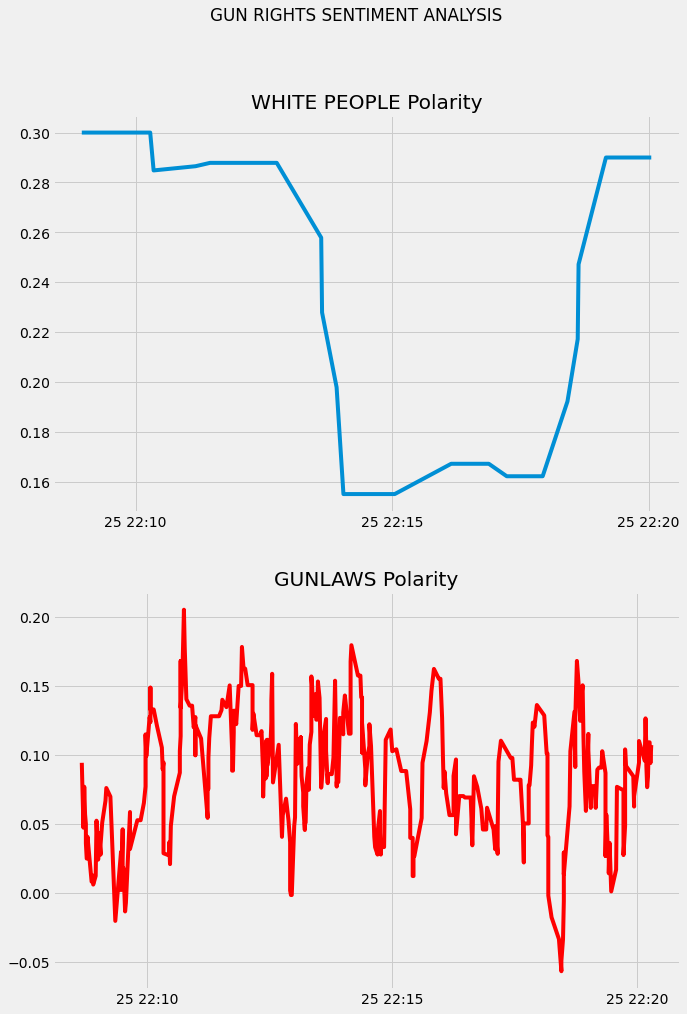

In [208]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

axes[0].plot(WHITE['Timestamp'], WHITE['MA Polarity'])
axes[0].set_title("\n".join(["WHITE PEOPLE Polarity"]))


axes[1].plot(GUNLAWS['Timestamp'], GUNLAWS['MA Polarity'], color='red')
axes[1].set_title("\n".join(["GUNLAWS Polarity"]))

fig.suptitle("\n".join(["GUN RIGHTS SENTIMENT ANALYSIS"]), y=0.98)

plt.show()